<a href="https://colab.research.google.com/github/PHYS-3510-SPRING-2026/hello-world-Raygarza1243/blob/main/Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

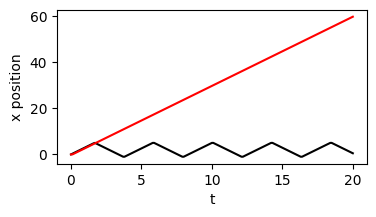

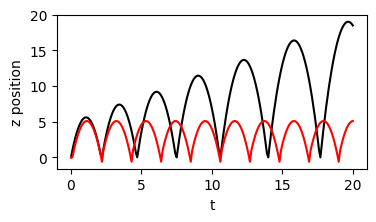

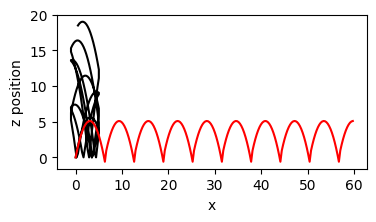

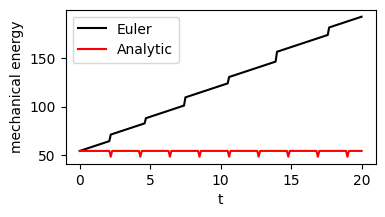

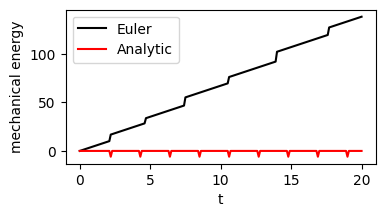

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def x_analytic(t):
    return xvel * t

def z_analytic(zvel, t, shift):
    return zvel * (t-shift) + 0.5 * g * (t-shift)**2

def zvel_analytic(zvel,t, shift):
    return zvel + g * (t-shift)

def mechanical_energy(pos, vel):
    return 0.5 * (vel[0]**2 + vel[1]**2) - g * pos[1]

def move_with_bounce(pos, vel):
    x, z = pos
    vx, vz = vel
    new_x = x + vx * dt
    new_z = z + vz * dt
    new_vx = vx
    new_vz = vz + g * dt

    if new_z < 0:
        new_z = 0
        new_vz = -new_vz
    if new_x < -1:
        new_x = -1
        new_vx = -new_vx
    if new_x > 5:
        new_x = 5
        new_vx = -new_vx
    return [new_x, new_z], [new_vx, new_vz]

dt = 0.1
t_range = np.arange(0, 20 + dt, dt)

g = -9.8

xpos = 0
xvel = 3

zpos = 0
zvel = 10

pos_list = [[xpos, zpos]]
vel_list = [[xvel, zvel]]
energy_list = [mechanical_energy(pos_list[0], vel_list[0])]

pos_list_analytic = pos_list.copy()
vel_list_analytic = vel_list.copy()
energy_list_analytic = energy_list.copy()


shift = 0
for t in t_range:
    pos_list_analytic.append([x_analytic(t), z_analytic(zvel, t, shift)])
    vel_list_analytic.append([xvel, zvel_analytic(zvel, t, shift)])
    if pos_list_analytic[-1][1] < 0:
        shift = t
        vel_list_analytic[-1][1] = zvel
    energy_list_analytic.append(mechanical_energy(pos_list_analytic[-1], vel_list_analytic[-1]))

for t in t_range:
    pos = pos_list[-1].copy()
    vel = vel_list[-1].copy()
    pos, vel = move_with_bounce(pos, vel)
    pos_list.append(pos)
    vel_list.append(vel)
    energy_list.append(mechanical_energy(pos, vel))

pos_list.pop()
vel_list.pop()
pos_list_analytic.pop()
vel_list_analytic.pop()
energy_list.pop()
energy_list_analytic.pop()

plt.figure(figsize=(4,2))
plt.plot(t_range, [p[0] for p in pos_list], 'k-')
plt.plot(t_range, [p[0] for p in pos_list_analytic], 'r-')
plt.xlabel('t')
plt.ylabel('x position')
plt.show()

plt.figure(figsize=(4,2))
plt.plot(t_range, [p[1] for p in pos_list], 'k-')
plt.plot(t_range, [p[1] for p in pos_list_analytic], 'r-')
plt.xlabel('t')
plt.ylabel('z position')
plt.show()

plt.figure(figsize=(4,2))
plt.plot([p[0] for p in pos_list], [p[1] for p in pos_list], 'k-')
plt.plot([p[0] for p in pos_list_analytic], [p[1] for p in pos_list_analytic], 'r-')
plt.xlabel('x')
plt.ylabel('z position')
plt.show()

plt.figure(figsize=(4,2))
plt.plot(t_range, energy_list, 'k-', label='Euler')
plt.plot(t_range, energy_list_analytic, 'r-', label='Analytic')
plt.xlabel('t')
plt.ylabel('mechanical energy')
plt.legend()
plt.show()

plt.figure(figsize=(4,2))
plt.plot(t_range, np.array(energy_list) - energy_list[0], 'k-', label='Euler')
plt.plot(t_range, np.array(energy_list_analytic) - energy_list_analytic[0], 'r-', label='Analytic')
plt.xlabel('t')
plt.ylabel('mechanical energy')
plt.legend()
plt.show()

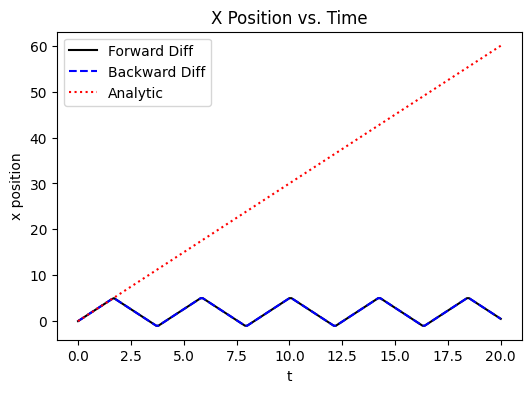

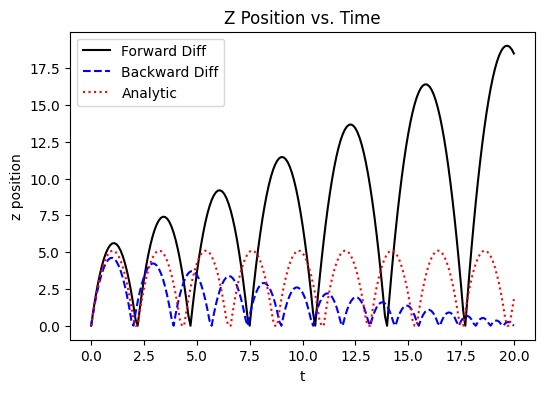

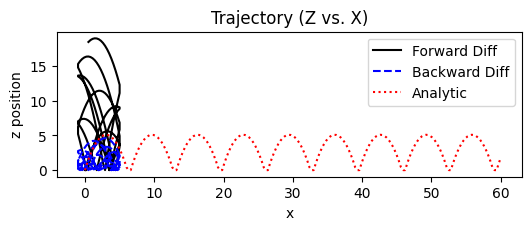

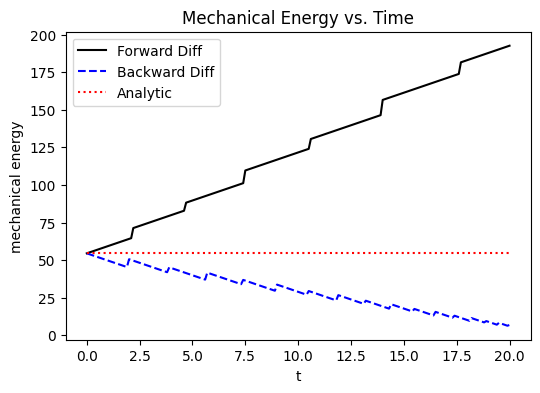

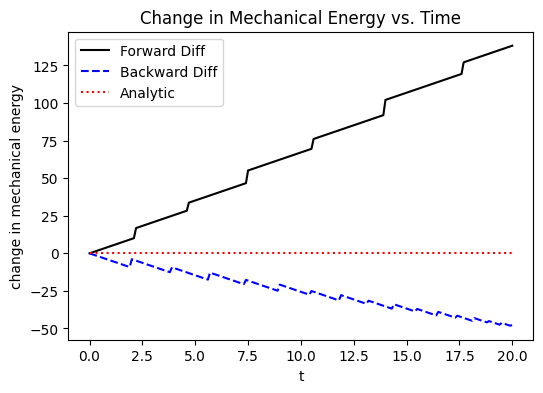

In [4]:
def move_with_bounce_forward_diff(pos, vel):
    x, z = pos
    vx, vz = vel

    new_x = x + vx * dt
    new_z = z + vz * dt
    new_vx = vx
    new_vz = vz + g * dt

    if new_z < 0:
        new_z = 0
        new_vz = -new_vz
    if new_x < -1:
        new_x = -1
        new_vx = -new_vx
    if new_x > 5:
        new_x = 5
        new_vx = -new_vx

    return [new_x, new_z], [new_vx, new_vz]

def move_with_bounce_backward_diff(pos, vel):
    x, z = pos
    vx, vz = vel

    new_vx = vx
    new_vz = vz + g * dt
    new_x = x + new_vx * dt
    new_z = z + new_vz * dt

    if new_z < 0:
        new_z = 0
        new_vz = -new_vz
    if new_x < -1:
        new_x = -1
        new_vx = -new_vx
    if new_x > 5:
        new_x = 5
        new_vx = -new_vx

    return [new_x, new_z], [new_vx, new_vz]

xpos = 0
zpos = 0
xvel = 3
zvel = 10

pos_list_forward_diff = [[xpos, zpos]]
vel_list_forward_diff = [[xvel, zvel]]
energy_list_forward_diff = [mechanical_energy(pos_list_forward_diff[0], vel_list_forward_diff[0])]

pos_list_backward_diff = [[xpos, zpos]]
vel_list_backward_diff = [[xvel, zvel]]
energy_list_backward_diff = [mechanical_energy(pos_list_backward_diff[0], vel_list_backward_diff[0])]

pos_list_analytic = [[xpos, zpos]]
vel_list_analytic = [[xvel, zvel]]
energy_list_analytic = [mechanical_energy(pos_list_analytic[0], vel_list_analytic[0])]

current_pos_fd = [xpos, zpos]
current_vel_fd = [xvel, zvel]

for t_step in t_range[1:]:
    current_pos_fd, current_vel_fd = move_with_bounce_forward_diff(current_pos_fd, current_vel_fd)
    pos_list_forward_diff.append(current_pos_fd.copy())
    vel_list_forward_diff.append(current_vel_fd.copy())
    energy_list_forward_diff.append(mechanical_energy(current_pos_fd, current_vel_fd))

xpos = 0
zpos = 0
xvel = 3
zvel = 10

current_pos_bd = [xpos, zpos]
current_vel_bd = [xvel, zvel]

for t_step in t_range[1:]:
    current_pos_bd, current_vel_bd = move_with_bounce_backward_diff(current_pos_bd, current_vel_bd)
    pos_list_backward_diff.append(current_pos_bd.copy())
    vel_list_backward_diff.append(current_vel_bd.copy())
    energy_list_backward_diff.append(mechanical_energy(current_pos_bd, current_vel_bd))

xpos = 0
zpos = 0
xvel = 3
zvel = 10

shift = 0

for t in t_range[1:]:
    current_x_analytic = x_analytic(t)
    current_z_analytic = z_analytic(zvel, t, shift)
    current_zvel_analytic = zvel_analytic(zvel, t, shift)

    if current_z_analytic < 0:
        shift = t
        zvel = -zvel_analytic(zvel, t, shift)
        current_z_analytic = z_analytic(zvel, t, shift)
        current_zvel_analytic = zvel_analytic(zvel, t, shift)

    pos_list_analytic.append([current_x_analytic, current_z_analytic])
    vel_list_analytic.append([xvel, current_zvel_analytic])
    energy_list_analytic.append(mechanical_energy(pos_list_analytic[-1], vel_list_analytic[-1]))

plt.figure(figsize=(6, 4))
plt.plot(t_range, [p[0] for p in pos_list_forward_diff], 'k-', label='Forward Diff')
plt.plot(t_range, [p[0] for p in pos_list_backward_diff], 'b--', label='Backward Diff')
plt.plot(t_range, [p[0] for p in pos_list_analytic], 'r:', label='Analytic')
plt.xlabel('t')
plt.ylabel('x position')
plt.title('X Position vs. Time')
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(t_range, [p[1] for p in pos_list_forward_diff], 'k-', label='Forward Diff')
plt.plot(t_range, [p[1] for p in pos_list_backward_diff], 'b--', label='Backward Diff')
plt.plot(t_range, [p[1] for p in pos_list_analytic], 'r:', label='Analytic')
plt.xlabel('t')
plt.ylabel('z position')
plt.title('Z Position vs. Time')
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot([p[0] for p in pos_list_forward_diff], [p[1] for p in pos_list_forward_diff], 'k-', label='Forward Diff')
plt.plot([p[0] for p in pos_list_backward_diff], [p[1] for p in pos_list_backward_diff], 'b--', label='Backward Diff')
plt.plot([p[0] for p in pos_list_analytic], [p[1] for p in pos_list_analytic], 'r:', label='Analytic')
plt.xlabel('x')
plt.ylabel('z position')
plt.title('Trajectory (Z vs. X)')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(t_range, energy_list_forward_diff, 'k-', label='Forward Diff')
plt.plot(t_range, energy_list_backward_diff, 'b--', label='Backward Diff')
plt.plot(t_range, energy_list_analytic, 'r:', label='Analytic')
plt.xlabel('t')
plt.ylabel('mechanical energy')
plt.title('Mechanical Energy vs. Time')
plt.legend()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(t_range, np.array(energy_list_forward_diff) - energy_list_forward_diff[0], 'k-', label='Forward Diff')
plt.plot(t_range, np.array(energy_list_backward_diff) - energy_list_backward_diff[0], 'b--', label='Backward Diff')
plt.plot(t_range, np.array(energy_list_analytic) - energy_list_analytic[0], 'r:', label='Analytic')
plt.xlabel('t')
plt.ylabel('change in mechanical energy')
plt.title('Change in Mechanical Energy vs. Time')
plt.legend()
plt.show()

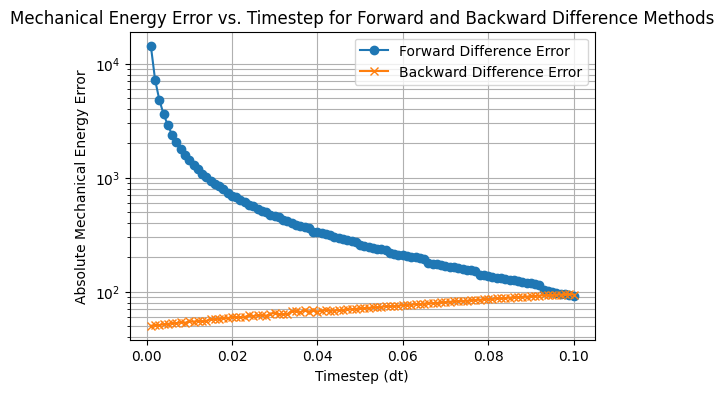

In [5]:
def run_simulation_and_get_error(dt):
    total_time = 20
    t_range = np.arange(0, total_time + dt, dt)

    xpos_fd, zpos_fd = 0, 0
    xvel_fd, zvel_fd = 3, 10
    current_pos_fd = [xpos_fd, zpos_fd]
    current_vel_fd = [xvel_fd, zvel_fd]
    pos_list_forward_diff = [current_pos_fd.copy()]
    vel_list_forward_diff = [current_vel_fd.copy()]
    energy_list_forward_diff = [mechanical_energy(current_pos_fd, current_vel_fd)]

    xpos_bd, zpos_bd = 0, 0
    xvel_bd, zvel_bd = 3, 10
    current_pos_bd = [xpos_bd, zpos_bd]
    current_vel_bd = [xvel_bd, zvel_bd]
    pos_list_backward_diff = [current_pos_bd.copy()]
    vel_list_backward_diff = [current_vel_bd.copy()]
    energy_list_backward_diff = [mechanical_energy(current_pos_bd, current_vel_bd)]

    xpos_an, zpos_an = 0, 0
    xvel_an, zvel_an = 3, 10
    shift_an = 0
    current_pos_an = [xpos_an, zpos_an]
    current_vel_an = [xvel_an, zvel_an]
    pos_list_analytic = [current_pos_an.copy()]
    vel_list_analytic = [current_vel_an.copy()]
    energy_list_analytic = [mechanical_energy(current_pos_an, current_vel_an)]


    for t_step_idx in range(1, len(t_range)):
        current_pos_fd, current_vel_fd = move_with_bounce_forward_diff(current_pos_fd, current_vel_fd)
        pos_list_forward_diff.append(current_pos_fd.copy())
        vel_list_forward_diff.append(current_vel_fd.copy())
        energy_list_forward_diff.append(mechanical_energy(current_pos_fd, current_vel_fd))

    for t_step_idx in range(1, len(t_range)):
        current_pos_bd, current_vel_bd = move_with_bounce_backward_diff(current_pos_bd, current_vel_bd)
        pos_list_backward_diff.append(current_pos_bd.copy())
        vel_list_backward_diff.append(current_vel_bd.copy())
        energy_list_backward_diff.append(mechanical_energy(current_pos_bd, current_vel_bd))

    zvel_current_analytic_initial = 10

    for i in range(1, len(t_range)):
        t = t_range[i]

        zvel_temp_an = zvel_current_analytic_initial

        current_x_analytic = x_analytic(t)
        current_z_analytic = z_analytic(zvel_temp_an, t, shift_an)
        current_zvel_analytic = zvel_analytic(zvel_temp_an, t, shift_an)

        if current_z_analytic < 0:
            shift_an = t
            zvel_current_analytic_initial = -current_zvel_analytic
            current_z_analytic = z_analytic(zvel_current_analytic_initial, t, shift_an)
            current_zvel_analytic = zvel_analytic(zvel_current_analytic_initial, t, shift_an)

        pos_list_analytic.append([current_x_analytic, current_z_analytic])
        vel_list_analytic.append([xvel_an, current_zvel_analytic])
        energy_list_analytic.append(mechanical_energy(pos_list_analytic[-1], vel_list_analytic[-1]))

    error_forward_diff = energy_list_forward_diff[-1] - energy_list_analytic[-1]
    error_backward_diff = energy_list_backward_diff[-1] - energy_list_analytic[-1]
    return error_forward_diff, error_backward_diff

dt_values = np.arange(0.001, 0.101, 0.001)

errors_forward_diff = []
errors_backward_diff = []

for dt_val in dt_values:
    error_fd, error_bd = run_simulation_and_get_error(dt_val)
    errors_forward_diff.append(error_fd)
    errors_backward_diff.append(error_bd)

plt.figure(figsize=(6, 4))
plt.plot(dt_values, np.abs(errors_forward_diff), 'o-', label='Forward Difference Error')
plt.plot(dt_values, np.abs(errors_backward_diff), 'x-', label='Backward Difference Error')
plt.xlabel('Timestep (dt)')
plt.ylabel('Absolute Mechanical Energy Error')
plt.title('Mechanical Energy Error vs. Timestep for Forward and Backward Difference Methods')
plt.yscale('log')
plt.legend()
plt.grid(True, which="both", ls="-")
plt.show()